In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
users = pd.read_excel("users_data.xlsx")
jobs = pd.read_excel("jobs_data.xlsx")
profiles = pd.read_excel("User_Profile_Data.xlsx") 

In [84]:
print("Excel files loaded successfully!")

Excel files loaded successfully!


In [85]:
users.head(5)

,User_ID,Personality,Preferred_Job_Roles,Skills
0,1,Strategic Thinker,"Data Scientist, ML Engineer","python, sql, machine learning"
1,2,Creative,Web Developer,"html, css, javascript, react"
2,3,Thoughtful Planner,Data Analyst,"excel, python, power bi"
3,4,Organized Worker,Backend Developer,"java, springboot, sql"
4,5,Creative Communicator,AI Engineer,"python, deep learning"


In [108]:
jobs.head(3)

,Job_ID,Job_Title,Required_Skills,Job_Description,Location,Company,Work_Mode
0,51,Data Scientist,"{machine learning, sql, python}",Analyze data,Bangalore,Hexaware,onsite
1,52,Web Developer,"{javascript, html, css}",Web Developer,Remote,WorkFlow,remote
2,53,ML Engineer,"{deep learning, python}",ML systems,Hyderabad,SPCL,hybrid


In [113]:
profiles.head(6)

,User_ID,Experience_Level,Preferred_Job_Role,Preferred_Work_Mode,Address
0,1,mid,Data Scientist,onsite,Bangalore
1,2,fresher,Web Developer,remote,Mumbai
2,3,mid,Data Analyst,hybrid,Pune
3,4,experienced,Backend Developer,onsite,Pune
4,5,mid,AI Engineer,remote,Delhi
5,6,mid,Data Scientist,onsite,Bangalore


In [87]:
specific_Column=profiles[['Preferred_Job_Role','Address','Preferred_Work_Mode']]
print(specific_Column.head(2))

  Preferred_Job_Role    Address Preferred_Work_Mode
0     Data Scientist  Bangalore              onsite
1      Web Developer     Mumbai              remote


In [88]:
def clean_list(text):
    if pd.isna(text):
        return set()
    return set(item.strip().lower() for item in str(text).split(","))

In [89]:
# Clean User_Data columns
users["Skills"] = users["Skills"].apply(clean_list)
users["Preferred_Job_Roles"] = users["Preferred_Job_Roles"].apply(clean_list)

# Clean Jobs_Data columns
jobs["Required_Skills"] = jobs["Required_Skills"].apply(clean_list)

In [90]:
# missing values in User Profile Dataset
profiles.fillna({
    "Preferred_Job_Role": "",
    "Preferred_Work_Mode": "",
    "Address": "",
    "Experience_Level": "fresher"
}, inplace=True)

In [91]:
print("Data cleaning is Done ")

Data cleaning is Done 


In [92]:
# Calculate user skills and required job skills
def skill_match(user_skills, job_skills):
    if not job_skills:
        return 0
    return len(user_skills & job_skills) / len(job_skills)

In [93]:
# Check the Job_Title exists in the user's Preferred_Job_Roles dataset
def role_match(user_roles, job_title):
    return 1 if str(job_title).lower() in user_roles else 0

experience_map = {"fresher": 1, "mid": 2, "experienced": 3}

In [94]:
def experience_match(user_exp):
    return experience_map.get(str(user_exp).lower(), 1) / 3

In [95]:
# Location and Work Mode matching and Score Calculate 
def preference_match(profile, job):
    score = 0
    if str(profile["Preferred_Job_Role"]).lower() == str(job["Job_Title"]).lower():
        score =score+0.4
    if str(profile["Preferred_Work_Mode"]).lower() == str(job["Work_Mode"]).lower():
        score =score+0.3
    if str(profile["Address"]).lower() == str(job["Location"]).lower():
        score =score+0.3
    return score

In [96]:
# Recommendation Job Using Column Name Job Dataset
def recommend_jobs(user, profile, jobs_df):
    recommendations = []
    for _, job in jobs_df.iterrows():
        skill_score = skill_match(user["Skills"], job["Required_Skills"])
        if skill_score < 0.2: 
            continue  

        role_score = role_match(user["Preferred_Job_Roles"], job["Job_Title"])
        exp_score = experience_match(profile["Experience_Level"])
        pref_score = preference_match(profile, job)

        final_score = (0.4 * skill_score + 0.25 * role_score + 
                       0.2 * exp_score + 0.15 * pref_score) # final score calculation 

        recommendations.append({
            "User_ID": user["User_ID"],
            "Job_ID": job["Job_ID"],
            "Job_Title": job["Job_Title"],
            "Company": job["Company"],
            "Location": job["Location"],
            "Work_Mode": job["Work_Mode"],
            "Skill_Match_Pct": int(skill_score * 100),
            "Final_Score": round(final_score, 2)
        })
    return sorted(recommendations, key=lambda x: x["Final_Score"], reverse=True)[:5]

In [97]:
#  Linking User_Data & User_Profile_Data via User_ID
all_results = []
for _, user in users.iterrows():
    user_profile = profiles[profiles["User_ID"] == user["User_ID"]]
    
    if user_profile.empty:
        continue

    user_recommendations = recommend_jobs(user, user_profile.iloc[0], jobs)
    all_results.extend(user_recommendations)

In [98]:
results_df = pd.DataFrame(all_results)
results_df.to_excel("job_recommendations.xlsx", index=False)

In [105]:
import os
file_name = 'job_recommendations.xlsx'
# Check file is exist or not 
if os.path.exists(file_name):
    # Load the existing data
    existing_df = pd.read_excel(file_name)
    updated_df = pd.concat([existing_df, results_df], ignore_index=True)#Combine the Old and New Data
    updated_df = updated_df.drop_duplicates()
else:
    updated_df = results_df
updated_df.to_excel(file_name, index=False)
print(f"File updated! New total rows: {len(updated_df)}")

File updated! New total rows: 16


In [100]:
print("Job recommendations File generated  With the name job_recommendations.xlsx")

Job recommendations File generated  With the name job_recommendations.xlsx


In [101]:
new_data = pd.read_excel("job_recommendations.xlsx")

In [102]:
new_data

,User_ID,Job_ID,Job_Title,Company,Location,Work_Mode,Skill_Match_Pct,Final_Score
0,1,51,Data Scientist,Hexaware,Bangalore,onsite,100,0.93
1,1,53,ML Engineer,SPCL,Hyderabad,hybrid,50,0.58
2,1,55,AI Engineer,R Square,Remote,remote,50,0.33
3,2,52,Web Developer,WorkFlow,Remote,remote,100,0.82
4,2,56,Full Stack,Google,Hyderabad,onsite,100,0.47
5,3,53,ML Engineer,SPCL,Hyderabad,hybrid,50,0.38
6,3,55,AI Engineer,R Square,Remote,remote,50,0.33
7,3,51,Data Scientist,Hexaware,Bangalore,onsite,33,0.27
8,4,54,Backend Developer,TCS,Pune,onsite,50,0.80
9,4,51,Data Scientist,Hexaware,Bangalore,onsite,33,0.38


C:\Users\nitin\AppData\Local\Temp\ipykernel_24716\3275123080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


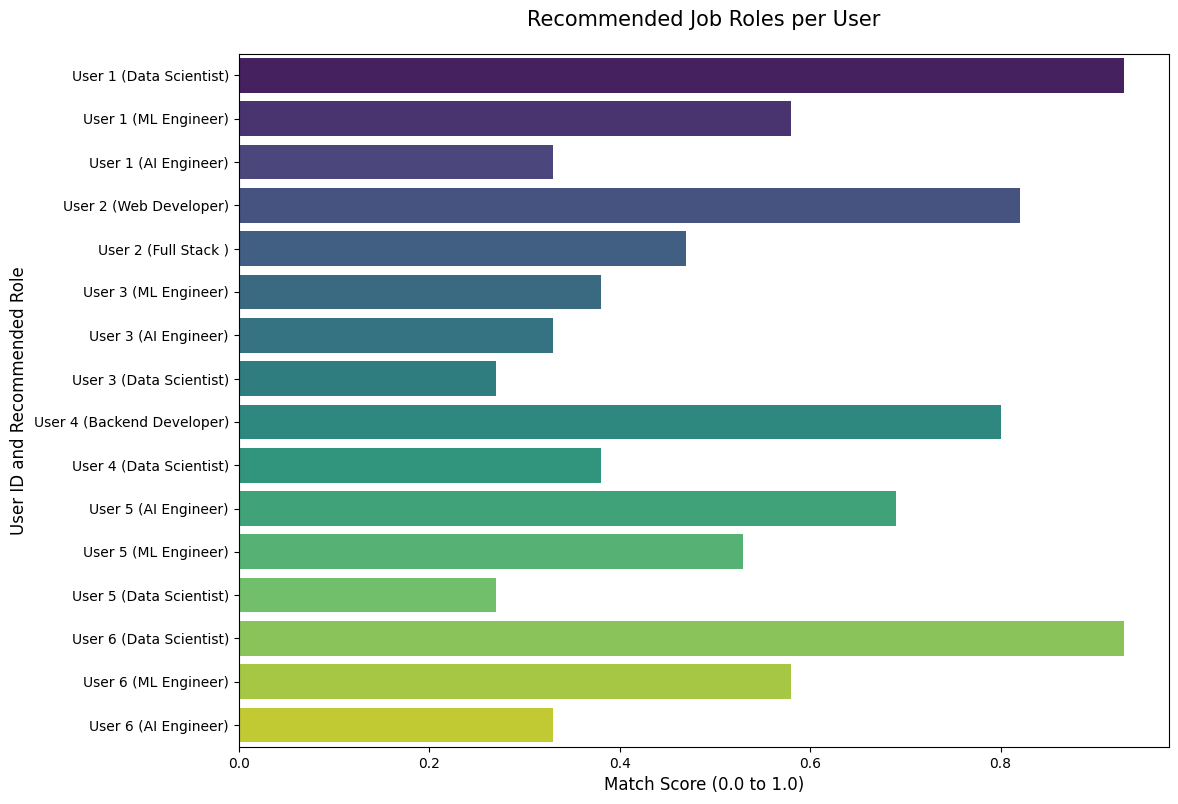

In [103]:
import seaborn as sns
df=new_data
df['User_Job'] = "User " + df['User_ID'].astype(str) + " (" + df['Job_Title'] + ")"
df_sorted = df.sort_values(['User_ID', 'Final_Score'], ascending=[True, False])
plt.figure(figsize=(12, 9))
sns.barplot(
    x='Final_Score', 
    y='User_Job', 
    data=df_sorted, 
    palette='viridis' 
)
plt.title('Recommended Job Roles per User', fontsize=15, pad=20)
plt.xlabel('Match Score (0.0 to 1.0)', fontsize=12)
plt.ylabel('User ID and Recommended Role', fontsize=12)
plt.show()